# HED Edge to Painting by Pix2Pix
 This notebook converts a HED edge map to a Chinese landscape painting using a pre-trained Pix2Pix model. 

 **Required input:** `{GDRIVE_PATH}pix2pix_model512_50_hed.zip`
 

## Imports

In [1]:
import tensorflow as tf

from matplotlib import pyplot as plt
from IPython import display

import numpy as np
import glob
from PIL import Image

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
GDRIVE_PATH = 'gdrive/MyDrive/ColabNotebooks/CSC2515_Project/Part2/'
IMG_WIDTH = 512
IMG_HEIGHT = 512

## Load Model

In [11]:
!unzip -q {GDRIVE_PATH}pix2pix_model512_50_hed.zip -d pix2pix_model512_50_hed

In [4]:
model_name = 'pix2pix_model512_50_hed/pix2pix_model512_50_hed'
saved_model_path = model_name
generator = tf.saved_model.load(saved_model_path)

## Predict painting based on edges

In [13]:
!unzip -q {GDRIVE_PATH}sketch_to_hed.zip -d sketch_to_hed

In [7]:
def normalize(input_image, real_image):
  input_image = (input_image / 127.5) - 1
  real_image = (real_image / 127.5) - 1

  return input_image, real_image

def generate_sketch_to_paintings(model, test_input, sketch):
  prediction = model(test_input, training=True)
  fig = plt.figure(figsize=(15,15))
  
  display_list = [test_input[0], sketch[0], prediction[0]]
  title = ['HED', 'Sketch', 'Predicted Image']

  for i in range(3):
    plt.subplot(1, 3, i+1)
    plt.title(title[i])
    # getting the pixel values between [0, 1] to plot it.
    plt.imshow(display_list[i] * 0.5 + 0.5)
    plt.axis('off')
  plt.show()

def get_pairs(path):
  hed_by_sketch = {}
  sketches = glob.iglob(path + '*_real.png', recursive=True)
  for sketch in sketches:
    sketchname = sketch.split('/')[-1]
    sketchname = '_'.join(sketchname.split('_')[:-1])
    hed = '/'.join(sketch.split('/')[:-1]) + '/' + sketchname + '_fake.png'
    hed_by_sketch[sketch] = hed
  return hed_by_sketch

def sketch_to_painting_predict(path):
  hed_by_sketch = get_pairs(path)

  for sketch in hed_by_sketch:
    im = Image.open(sketch)
    im = im.convert('RGB')
    im = np.asarray(im, dtype=np.float32)

    e = Image.open(hed_by_sketch[sketch])
    e = e.convert('RGB')
    e = np.asarray(e, dtype=np.float32)

    im = tf.constant(im)
    e = tf.constant(e)

    input_image, sketch_img = normalize(e, im)

    input_image = tf.expand_dims(input_image, 0)
    sketch_img = tf.expand_dims(sketch_img, 0)

    sketchname = sketch.split('/')[-1]
    sketchname = '_'.join(sketchname.split('_')[:-1]) + '_p2p.png'
    generate_sketch_to_paintings(generator, input_image, sketch_img)


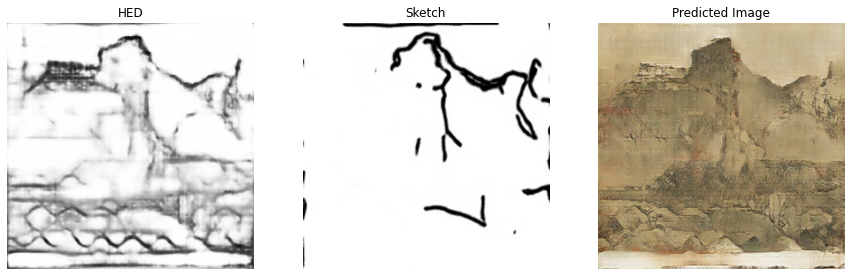

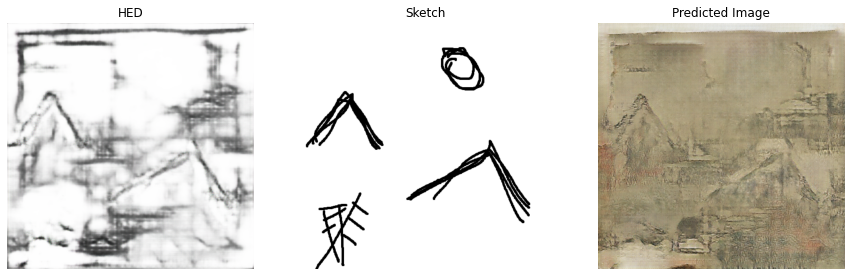

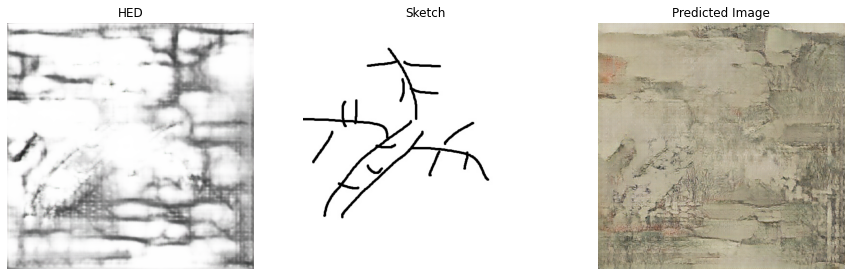

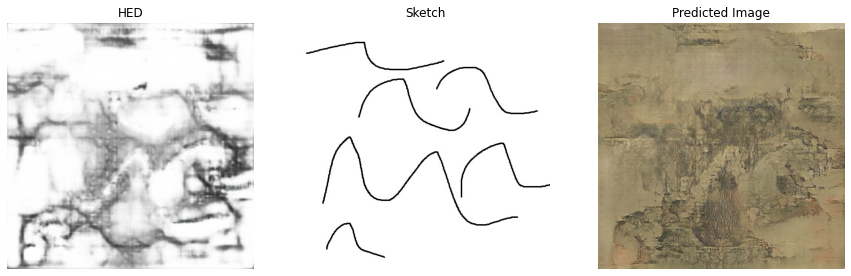

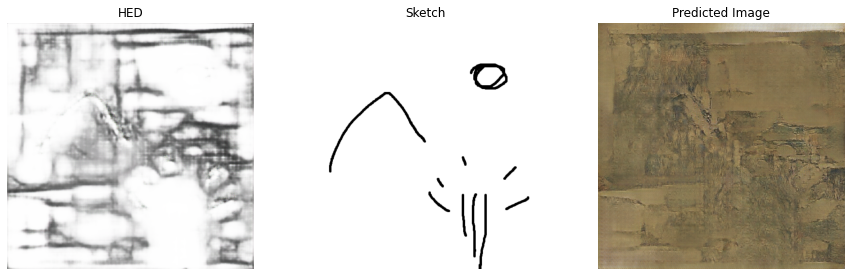

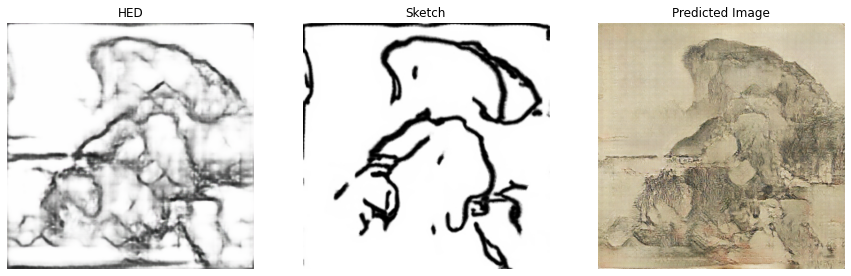

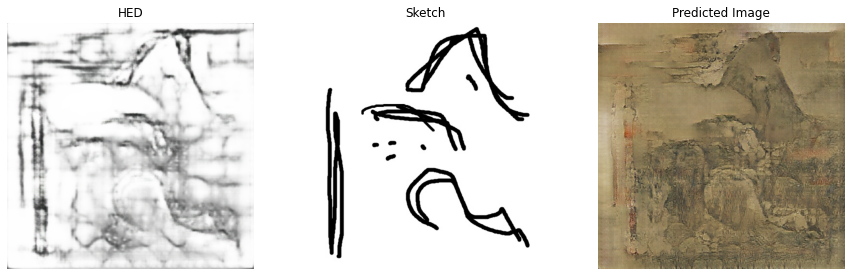

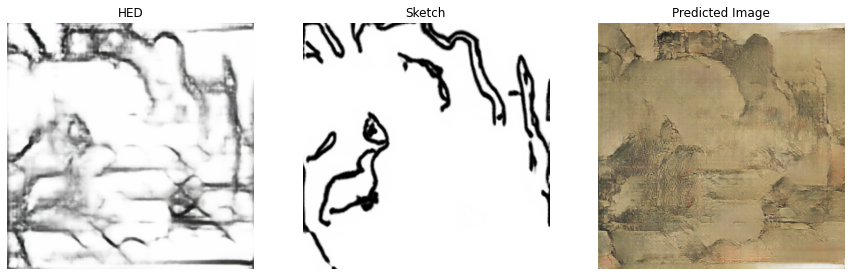

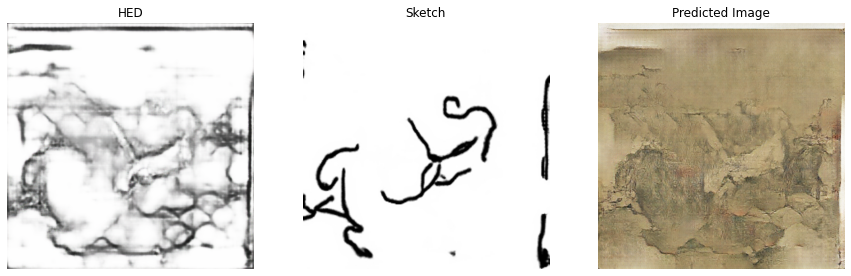

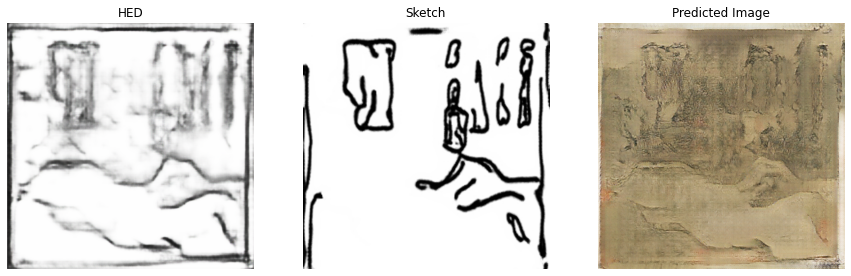

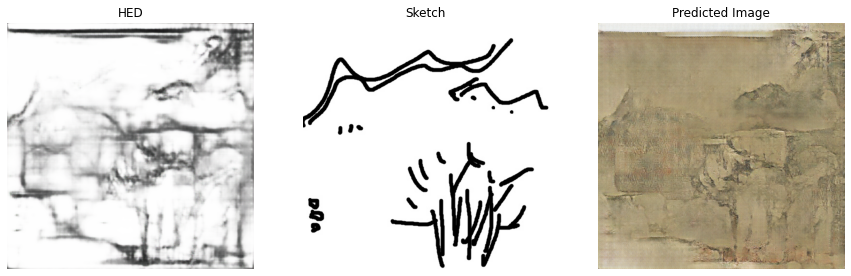

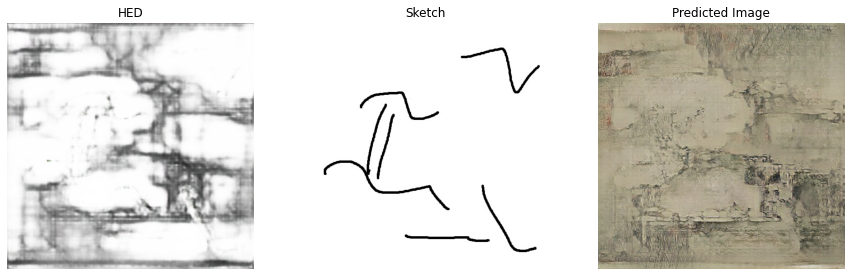

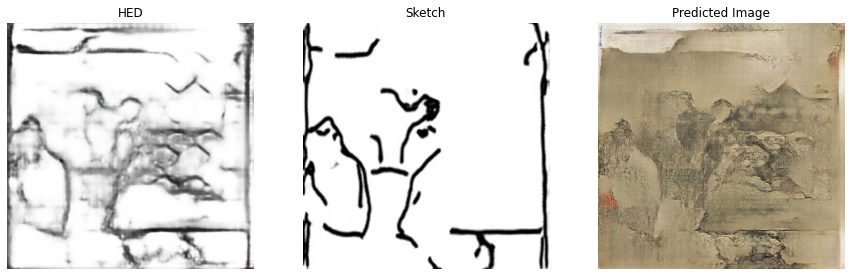

In [8]:
sketch_to_painting_predict('sketch_to_hed/test/images/')